fasttext적용위치 
불용어제거하고 okt또는 macab 토큰화 후에 적용

,sentiment,text
1,positive,12514
0,negative,12486


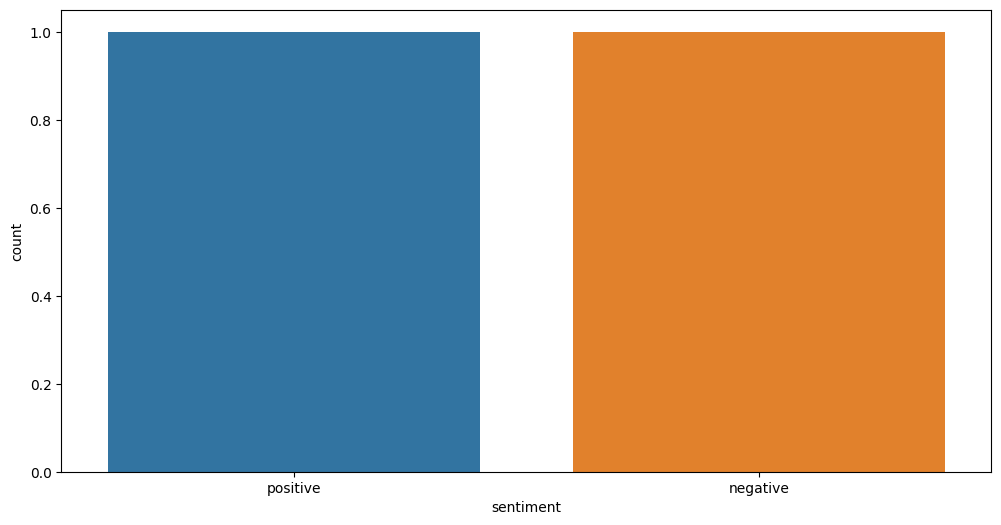

In [2]:
#시각화용 임포트 모음
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import tensorflow as tf
import numpy as np
import pandas as pd

#1. Naver Sentiment Movie Corpus v1.0 다운로드
train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
train_text = open(train_file,'rb').read().decode(encoding='utf-8')


df_train = pd.DataFrame({
    'text':[ row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t')>0 ],
    'sentiment': [ int(row.split('\t')[2]) for row in train_text.split('\n')[1:] if row.count('\t')>0]
})

# 데이터 크기 지정
df_train = df_train[::6]

#널값제거
df_train.dropna(inplace=True)


# 긍정/부정 분포 시각화
df_train['sentiment']=df_train['sentiment'].replace({0:'negative',1:'positive'})
temp = df_train.groupby('sentiment').count().reset_index().sort_values(by='text',ascending=False)
display(temp)
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=temp)

#피라미드그래프
fig = go.Figure(go.Funnelarea(
    text = temp.sentiment ,
    values = temp.text ,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


In [3]:
#문장 추출
texts= [ ]
for i in df_train['text']:
    texts.append(i)
len(texts)

#문자열이 아닌게 있는지 확인
for i in texts:
    if type(i)!=str:
        print(i)
        
# train 데이터 입력값(X)을 정제(Cleaning)
import re
from soynlp.normalizer import repeat_normalize

def clean_korean_text(text):
    # 특수 문자 및 숫자 제거
    text = re.sub(r'[^가-힣ㄱ-ㅎㅏ-ㅣ\s]', '', text)
    # 반복되는 자음, 모음 제거 (e.g., 'ㅋㅋㅋ' -> 'ㅋ')
    text = repeat_normalize(text, num_repeats=1)
    # 띄어쓰기 정규화 (연속된 공백 문자를 하나의 공백 문자로 변환)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

clean_texts=[]
for i in texts:
    clean_texts.append(clean_korean_text(i))


In [4]:
# len(clean_texts)
clean_texts[:5]

['아 더빙 진짜 짜증나네요 목소리',
 '원작의 긴장감을 제대로 살려내지못했다',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드',
 '주제는 좋은데 중반부터 지루하다']

In [5]:
#정제된 텍스트를 벡터화하기전에 토큰화한다
from konlpy.tag import Mecab
mecab=Mecab(dicpath=r'C:/mecab/mecab-ko-dic')
tokenized_clean_texts =[ mecab.morphs(i) for i in clean_texts ]
tokenized_clean_texts

[['아', '더', '빙', '진짜', '짜증', '나', '네요', '목소리'],
 ['원작', '의', '긴장감', '을', '제대로', '살려', '내', '지', '못했', '다'],
 ['울',
  '면서',
  '손들',
  '고',
  '횡단',
  '보도',
  '건널',
  '때',
  '뛰쳐나올',
  '뻔',
  '이범수',
  '연기',
  '드럽',
  '게',
  '못해'],
 ['이건',
  '정말',
  '깨알',
  '캐스팅',
  '과',
  '질퍽',
  '하',
  '지',
  '않',
  '은',
  '산뜻',
  '한',
  '내용',
  '구성',
  '이',
  '잘',
  '버',
  '무',
  '러진',
  '깨알',
  '일',
  '드'],
 ['주제', '는', '좋', '은데', '중반', '부터', '지루', '하', '다'],
 ['엄',
  '포스',
  '의',
  '위력',
  '을',
  '다시',
  '한',
  '번',
  '깨닫',
  '게',
  '해',
  '준',
  '적남',
  '꽃',
  '검사',
  '님',
  '도',
  '연기',
  '정말',
  '좋',
  '았',
  '어요',
  '완전',
  '명품',
  '드라마'],
 ['키이라',
  '나이틀리',
  '가',
  '연기',
  '하',
  '고자',
  '했',
  '던',
  '건',
  '대체',
  '정신',
  '장애',
  '일까',
  '틱',
  '장애',
  '일까'],
 ['오', '게', '두', '어라', '서리', '한', '이', '굶주렸', '다'],
 ['난', '우리', '영화', '를', '사랑', '합니다'],
 ['재미있', '어요'],
 ['보', '는', '내내', '그대로', '들어맞', '는', '예측', '카리스마', '없', '는', '악역'],
 ['예전',
  '작품',
  '캐릭터',
  '에피소드',
  '재탕',
  '삼',
  '탕',
  '사골',


패스트텍스트 학습해보기

In [1]:
from gensim.models import fasttext

In [ ]:
model =fasttext()